In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import networkx as nx


from netgraph import Graph, InteractiveGraph

from networkx.algorithms.community import girvan_newman, modularity_max, louvain_communities

from visu_utils import *

# white grid
sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:

PREFIX = "mteb_ds"

df_paths = ["exported_data/normalized_m1.df", "exported_data/normalized_m2.df", "exported_data/normalized_m4.df","exported_data/normalized_13.df", "exported_data/normalized_m10.df", "exported_data/normalized_m12.df"]

# read csv
dfs = [pd.read_csv(path) for path in df_paths]

dfs = pd.concat(dfs).reset_index()


dfs = text_embeddings_metadata_results_preprocessing(dfs, models=MODELS_MAIN_EXPES)


METRIC = "I(X_1->X_2)/d_2"
dfs.columns

Index(['model_1', 'model_2', 'marg_modes', 'cond_modes', 'datasets', 'index',
       'Unnamed: 0', 'id', 'date', 'd_1', 'd_2', 'dataset_filter',
       'I(X_1->X_2)', 'H(X_2)', 'H(X_2|X_1)', 'batch_size', 'eval_batch_size',
       'lr', 'margin_lr', 'device', 'stopping_criterion', 'n_epochs',
       'n_epochs_marg', 'eps', 'n_epochs_stop', 'average', 'cov_diagonal',
       'cov_off_diagonal', 'optimize_mu', 'use_tanh', 'init_std',
       'ff_residual_connection', 'ff_activation', 'ff_layer_norm', 'ff_layers',
       'ff_dim_hidden', 'I(X_1->X_2)/H(X_2)', 'I(X_1->X_2)/d_1',
       'I(X_1->X_2)/d_2', 'X', 'Y'],
      dtype='object')

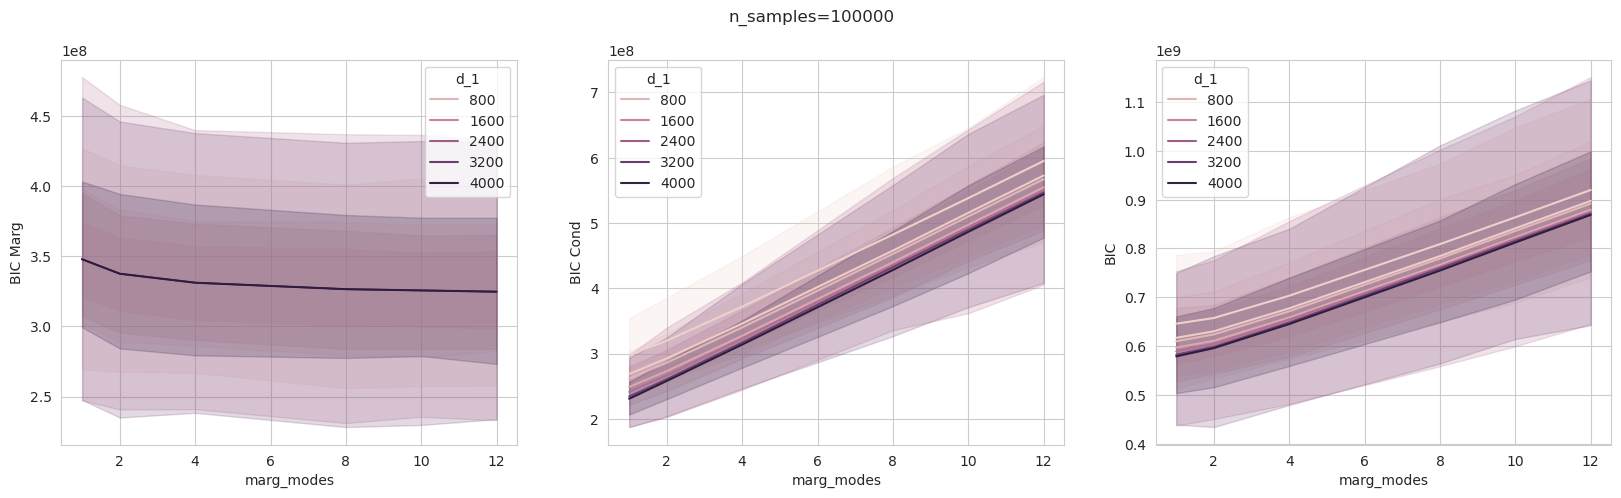

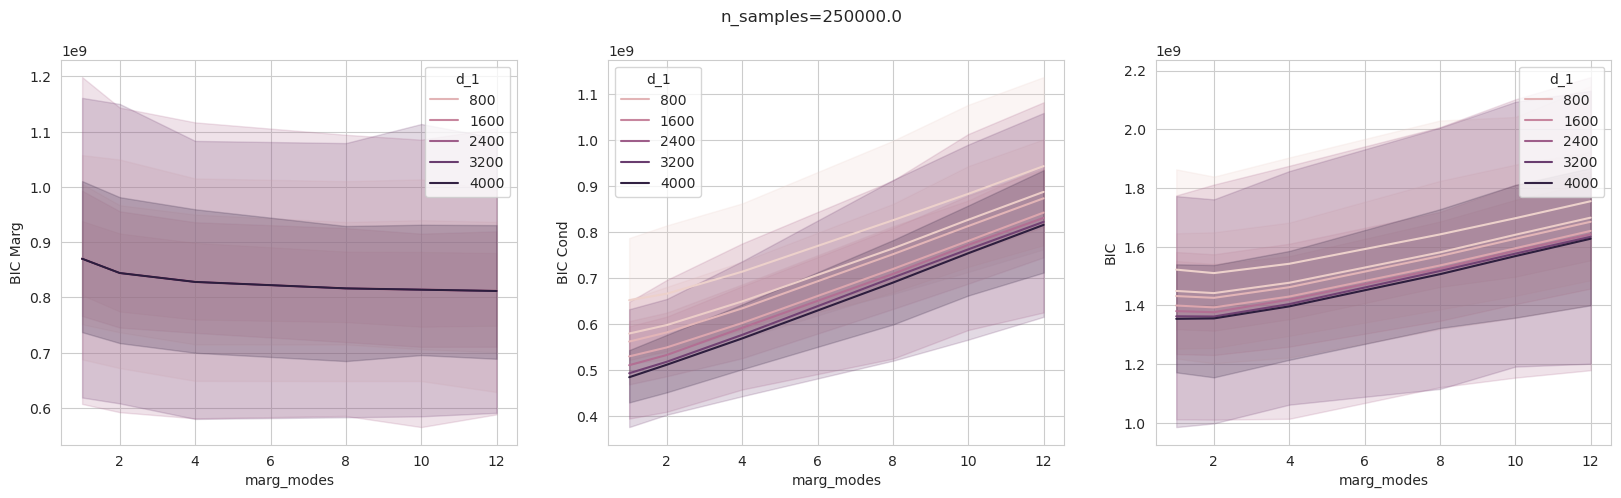

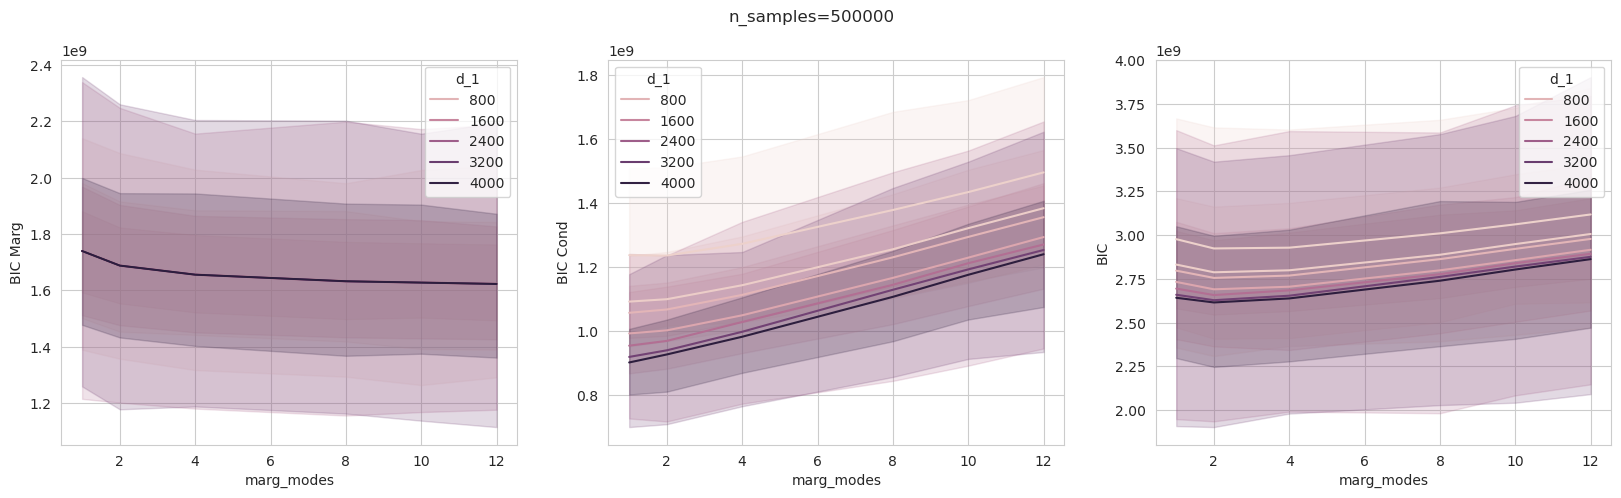

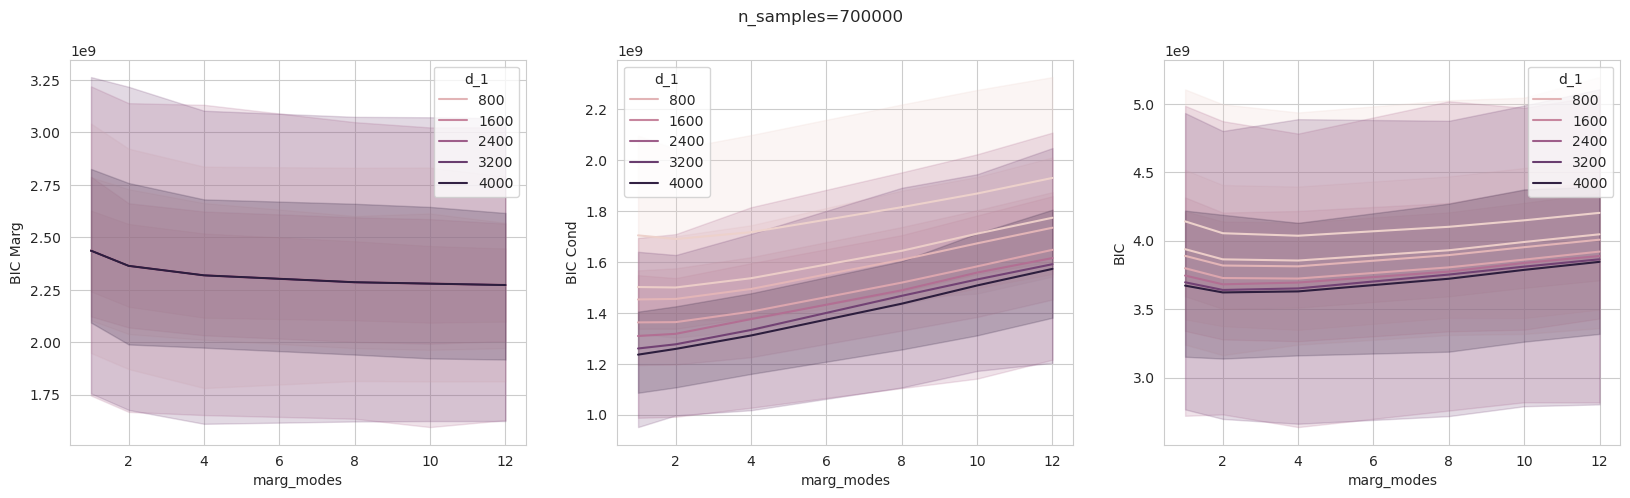

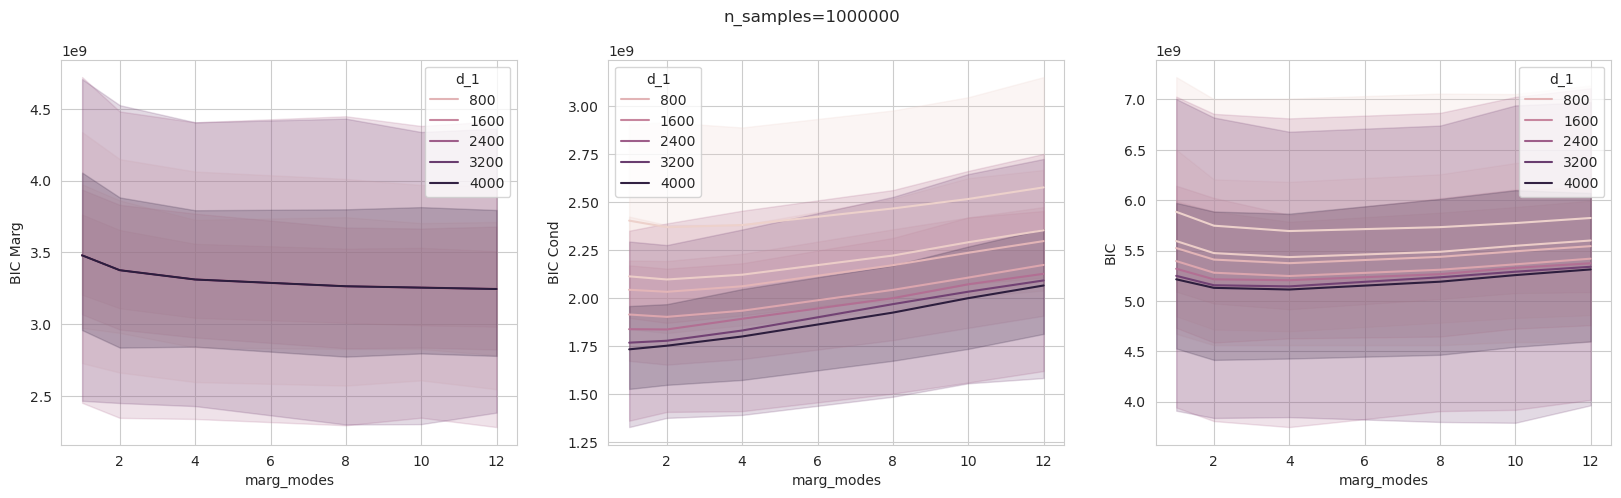

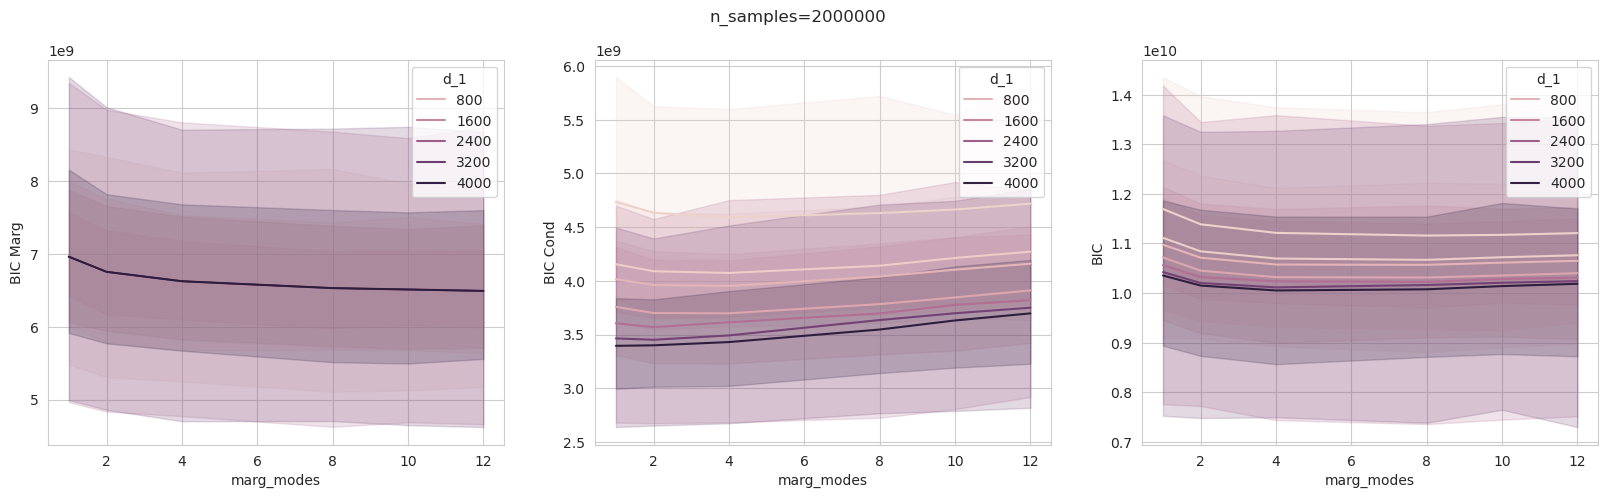

In [26]:


for n_samples in [10**5, 2.5*10**5, 5*10**5, 7*10**5, 10**6, 2*10**6]:
    d = dfs

    N_param =  d['marg_modes'] * d['d_2'] * 2 + d['marg_modes']
    N_param_cond = d['d_2']*d['cond_modes'] * 2*1024 + 1024*1024*3 + 1024*d['cond_modes']


    d['BIC Marg'] = np.log(n_samples) * N_param + 2*d['H(X_2)'] * n_samples
    d['BIC Cond'] = np.log(n_samples) * N_param_cond + 2*d['H(X_2|X_1)'] * n_samples

    d['BIC'] = d['BIC Marg'] + d['BIC Cond']


    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    sns.lineplot(d, x='marg_modes', y='BIC Marg', ax=ax[0], hue="d_1")
    sns.lineplot(d, x='marg_modes', y='BIC Cond', ax=ax[1], hue="d_1")
    sns.lineplot(d, x='marg_modes', y='BIC', ax=ax[2], hue="d_1")
    
    plt.suptitle(f"n_samples={n_samples}")


<Axes: xlabel='marg_modes', ylabel='H(X_2)'>

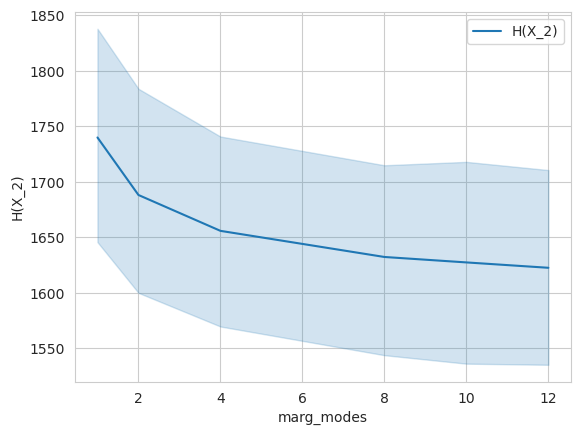

In [22]:
sns.lineplot(d, x='marg_modes', y='H(X_2)', label='H(X_2)')

<Axes: xlabel='marg_modes', ylabel='H(X_2|X_1)'>

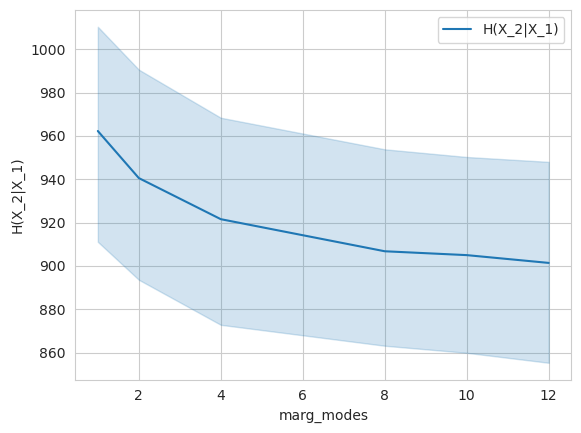

In [23]:


sns.lineplot(d, x='marg_modes', y='H(X_2|X_1)', label='H(X_2|X_1)')


In [15]:



d['AIC Marg'] = 2 * N_param + 2*d['H(X_2)'] * n_samples
d['AIC Cond'] = 2 * N_param_cond + 2*d['H(X_2|X_1)'] * n_samples

d['AIC'] = d['AIC Marg'] + d['AIC Cond']





<Axes: xlabel='marg_modes', ylabel='AIC'>

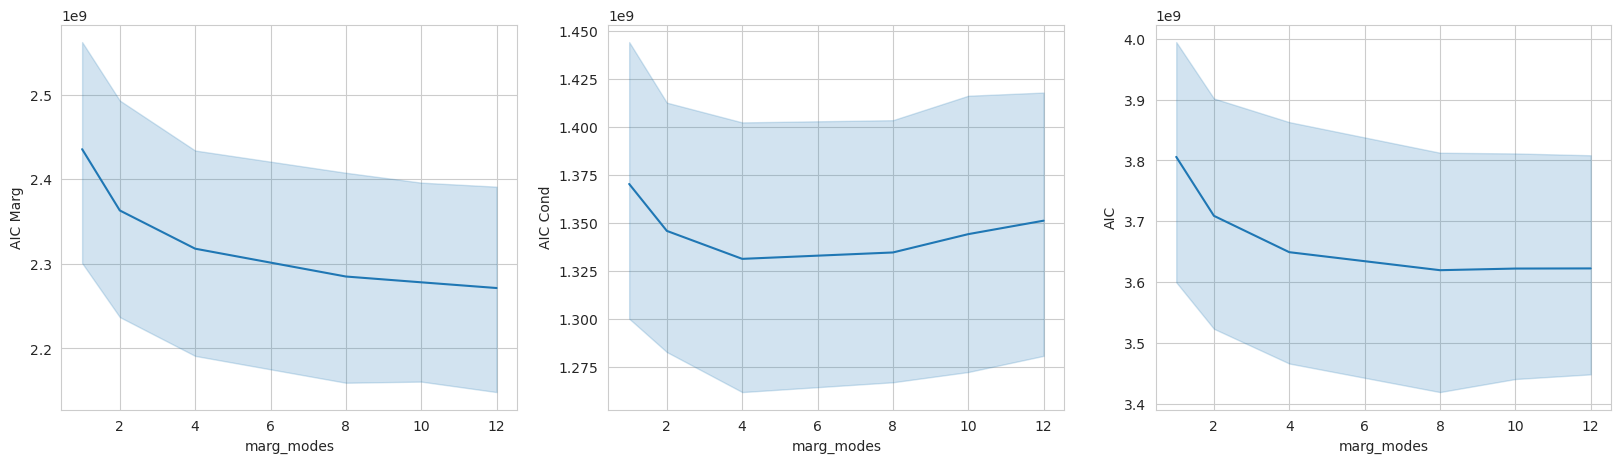

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(d, x='marg_modes', y='AIC Marg', ax=ax[0])
sns.lineplot(d, x='marg_modes', y='AIC Cond', ax=ax[1])
sns.lineplot(d, x='marg_modes', y='AIC', ax=ax[2])